In [25]:
#importing required modules
import nltk
from nltk import FreqDist
import glob
import csv
import matplotlib.pyplot as plt

#Relative path for NLTK files. This reads the files correctly but still shows some lookup error so i have kept this commented
#path=nltk.data.find('corpora/gutenberg/*')
#file_list= glob.glob(path)

#Opened the file using glob
file_list = glob.glob(r'C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\*')

In [26]:
#to prove Zipf's law according to the law that 80% of the text is covered by top 20% of the words

for x in file_list:
    with open(x, 'r') as f:
        lines=f.read()
        lines_split = lines.split()
        
        #converting words to lowercase
        file_lower = [words.lower() for words in lines_split]
        total_word_count = len(file_lower)
        freq_words = calc_freq(file_lower);
        
        #calculating top 20% words
        percent_word = round(len(freq_words)*0.20)
        frq_words = FreqDist(freq_words)
        top_words = frq_words.most_common(percent_word)
        dict_words = dict(top_words)
        freq_top_words = sum(dict_words.values())
        
        #to prove zipf's law
        Zipf_law_calc = (freq_top_words/total_word_count)*100
        
        #reverse the sorted list 
        sorted_list = sorted(freq_words.items(), key = lambda x:x[1], reverse = True)
        with open(x[59:-4]+('.csv'), 'w', newline="") as csvfile:
            csv_output = csv.writer(csvfile)
            csv_output.writerow(['Word', 'Freq', 'Rank'])
            rank = 1
            for row in sorted_list:
                csv_output.writerow([row[0], row[1], rank])
                rank +=1
                csvfile.close
        print('File ', x ,':', Zipf_law_calc)
    

File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\austen-emma.txt : 88.68474460538545
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\austen-persuasion.txt : 85.82369040188217
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\austen-sense.txt : 87.43121971771646
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\bible-kjv.txt : 93.15129217800283
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\blake-poems.txt : 70.35792549306062
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\bryant-stories.txt : 83.13255631903975
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\burgess-busterbrown.txt : 81.27284183994959
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\carroll-alice.txt : 80.75483114623908
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\chesterton-ball.txt : 83.51797838182308
File  C:\Users\HP\AppData\Roaming\nltk_data\corpora\gutenberg\chesterton-brown.txt : 82.45190294

In [27]:
# Function to calculate frequency of words
def calc_freq(file):
    frequency = {}
    for y in file:
        if y not in frequency:
            frequency[y] = 1
        else:
            frequency[y] += 1
    return frequency

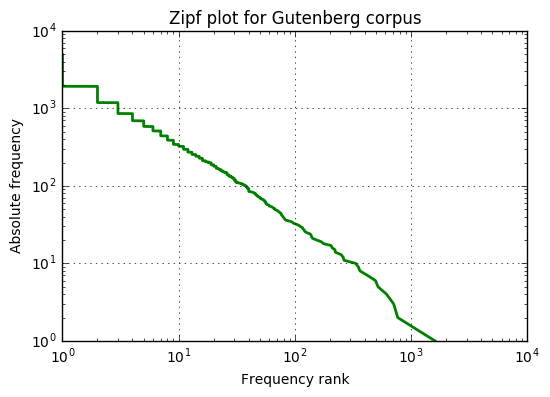

In [29]:
csvfile = open('roll-alice.csv', 'r')
w=[]
f=[]
r=[]
csv_f=csv.reader(csvfile)
for row in csv_f:
    w.append(row[0])
    f.append(row[1])
    r.append(row[2])
r.pop(0)
f.pop(0)
plt.loglog(f,r,color='g',linewidth=2)
plt.grid(True)
plt.title("Zipf plot for Gutenberg corpus")
plt.xlabel("Frequency rank")
plt.ylabel("Absolute frequency")
plt.show()
